In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

trips_df = pd.read_csv("BikeShare/metro-bike-share-trips-2020-q1.csv")
trips_df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,134867493,25,1/1/2020 0:16,1/1/2020 0:41,3063,34.048038,-118.253738,4491,34.047440,-118.247940,18419,30,One Way,Monthly Pass,electric
1,134867799,35,1/1/2020 0:24,1/1/2020 0:59,4285,NaN,NaN,4354,34.017681,-118.409081,15661,1,One Way,One Day Pass,smart
2,134868104,37,1/1/2020 0:31,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15848,1,One Way,Walk-up,smart
3,134868103,36,1/1/2020 0:32,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,16053,1,One Way,Walk-up,smart
4,134868102,35,1/1/2020 0:33,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15694,1,One Way,Walk-up,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,140275195,65,3/31/2020 22:48,3/31/2020 23:53,4460,33.994850,-118.417961,4460,33.994850,-118.417961,15300,30,Round Trip,Monthly Pass,smart
76387,140274593,23,3/31/2020 23:00,3/31/2020 23:23,3076,34.040600,-118.253838,3031,34.044701,-118.252441,16811,30,One Way,Monthly Pass,electric
76388,140274893,14,3/31/2020 23:23,3/31/2020 23:37,3031,34.044701,-118.252441,3076,34.040600,-118.253838,16811,30,One Way,Monthly Pass,electric
76389,140275293,21,3/31/2020 23:37,3/31/2020 23:58,3076,34.040600,-118.253838,3056,34.037460,-118.265381,16811,30,One Way,Monthly Pass,electric


Here we describe the duration, arguably the most important attirubte.

The average ride is about 24 minutes. At least 75% of riders are riding at or under 20 minutes.

In [34]:
trips_df["duration"].describe()

count    76391.000000
mean        23.976607
std         92.979710
min          1.000000
25%          6.000000
50%         11.000000
75%         20.000000
max       1440.000000
Name: duration, dtype: float64

I will show the distances the bikes traveled.

Let's create a df that will hold the distance.

In [39]:
distance_df = pd.DataFrame(columns = ['distance'])
distance_df

,distance


Here I get the distance by using the latitude and longitude

In [40]:
from math import sin, cos, sqrt, atan2, radians


# approximate radius of earth in km
R = 3963

for index, trip in trips_df.iterrows():
    lat1 = radians(trip["start_lat"])
    lon1 = radians(trip["start_lon"])
    lat2 = radians(trip["end_lat"])
    lon2 = radians(trip["end_lon"])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    new_item = {'distance' : distance}
    
    distance_df = distance_df.append(new_item, ignore_index=True)

distance_df

,distance
0,0.334849
1,NaN
2,3.612582
3,3.612582
4,3.612582
...,...
76386,0.000000
76387,0.294739
76388,0.294739
76389,0.696335


I drop distances that are 0 and describe the data.

Here I can see the average ride is about 0.87 miles and 75% of riders ride 1.1 miles or less.

In [43]:
# Get names of indexes for which column Age has value 30
indexZero = distance_df[ distance_df['distance'] == 0 ].index
# Delete these row indexes from dataFrame
distance_df.drop(indexZero , inplace=True)

distance_df.drop
distance_df.describe()

,distance
count,64027.000000
mean,0.870252
std,0.687405
min,0.066352
25%,0.425216
50%,0.665789
75%,1.112903
max,11.638144


Let's see the relationship between passholde type and bike type.

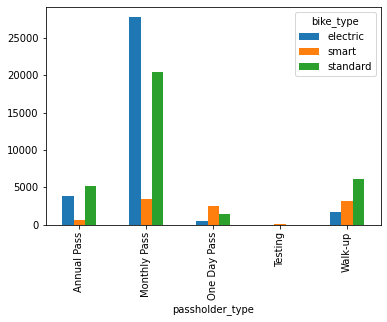

In [22]:
trips_df.groupby("passholder_type")["bike_type"].value_counts().unstack().plot.bar()

Monthly pass users rode electric bikes more often than others.

Furthermore, monthly pass users clearly outnumber all other types of users.

Let's also see the relationship between passholder type and trip route category

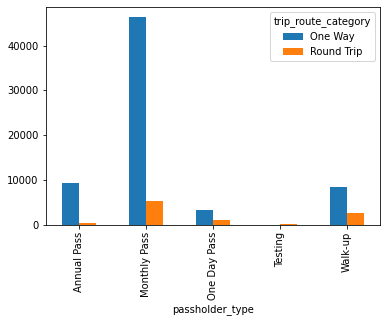

In [51]:
trips_df.groupby("passholder_type")["trip_route_category"].value_counts().unstack().plot.bar()

This EDA is relatively short, however, I visualize the arrival and departures in "LA Metro Bike Share Visaualizatons.ipynb"